In [1]:
import pandas as pd
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import spacy
import string
from gensim.models.phrases import Phrases, Phraser
import pyLDAvis
import pyLDAvis.gensim
from gensim.utils import lemmatize
from pprint import pprint
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
cnn = pd.read_csv("../data/cnn.csv")

In [3]:
cnn_abstract = cnn[['Abstract','Title']].dropna().reset_index(drop = True)

In [4]:
cnn_abstract.head()

,Abstract,Title
0,Incomplete surgical resection of head and neck...,The Use of Optical Coherence Tomography and Co...
1,We implement 2 different multitask learning (M...,Automatic extraction of cancer registry report...
2,Convolutional neural network (CNN) is employed...,Convolutional neural networks for the design a...
3,The purpose of the present study was to evalua...,Deep Learning-Based Deep Brain Stimulation Tar...
4,We apply convolutional neural network (CNN) mo...,Estimating PM2.5 concentration of the contermi...


In [5]:
stop_words = stopwords.words('english')
nlp = spacy.load('en', disable=['parser', 'ner'])
# clean the text using below for loop
clean_text = []
for index in range(len(cnn_abstract)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', cnn_abstract['Abstract'][index])

    #Convert to lowercase
    text = text.lower()
    
    #remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Convert to list of words from text
    text = text.split()
    
    # remove stop words after splitting text and joint the words
    text =[word for word in text if word not in stop_words]
    text = " ".join(text)
    # lemmatize words using spacy
    
    doc = nlp(text)
    text=" ".join([token.lemma_ for token in doc])

   # append to clean_text
    clean_text.append(text)
    
cnn_abstract['clean_text'] = clean_text

In [6]:
cnn_text = cnn_abstract[cnn_abstract.clean_text.str.contains('natural language processing|nlp')]

In [7]:
cnn_text.shape

(58, 3)

In [8]:
cnn_text.to_csv('../data/cnn_text.csv', index = False)

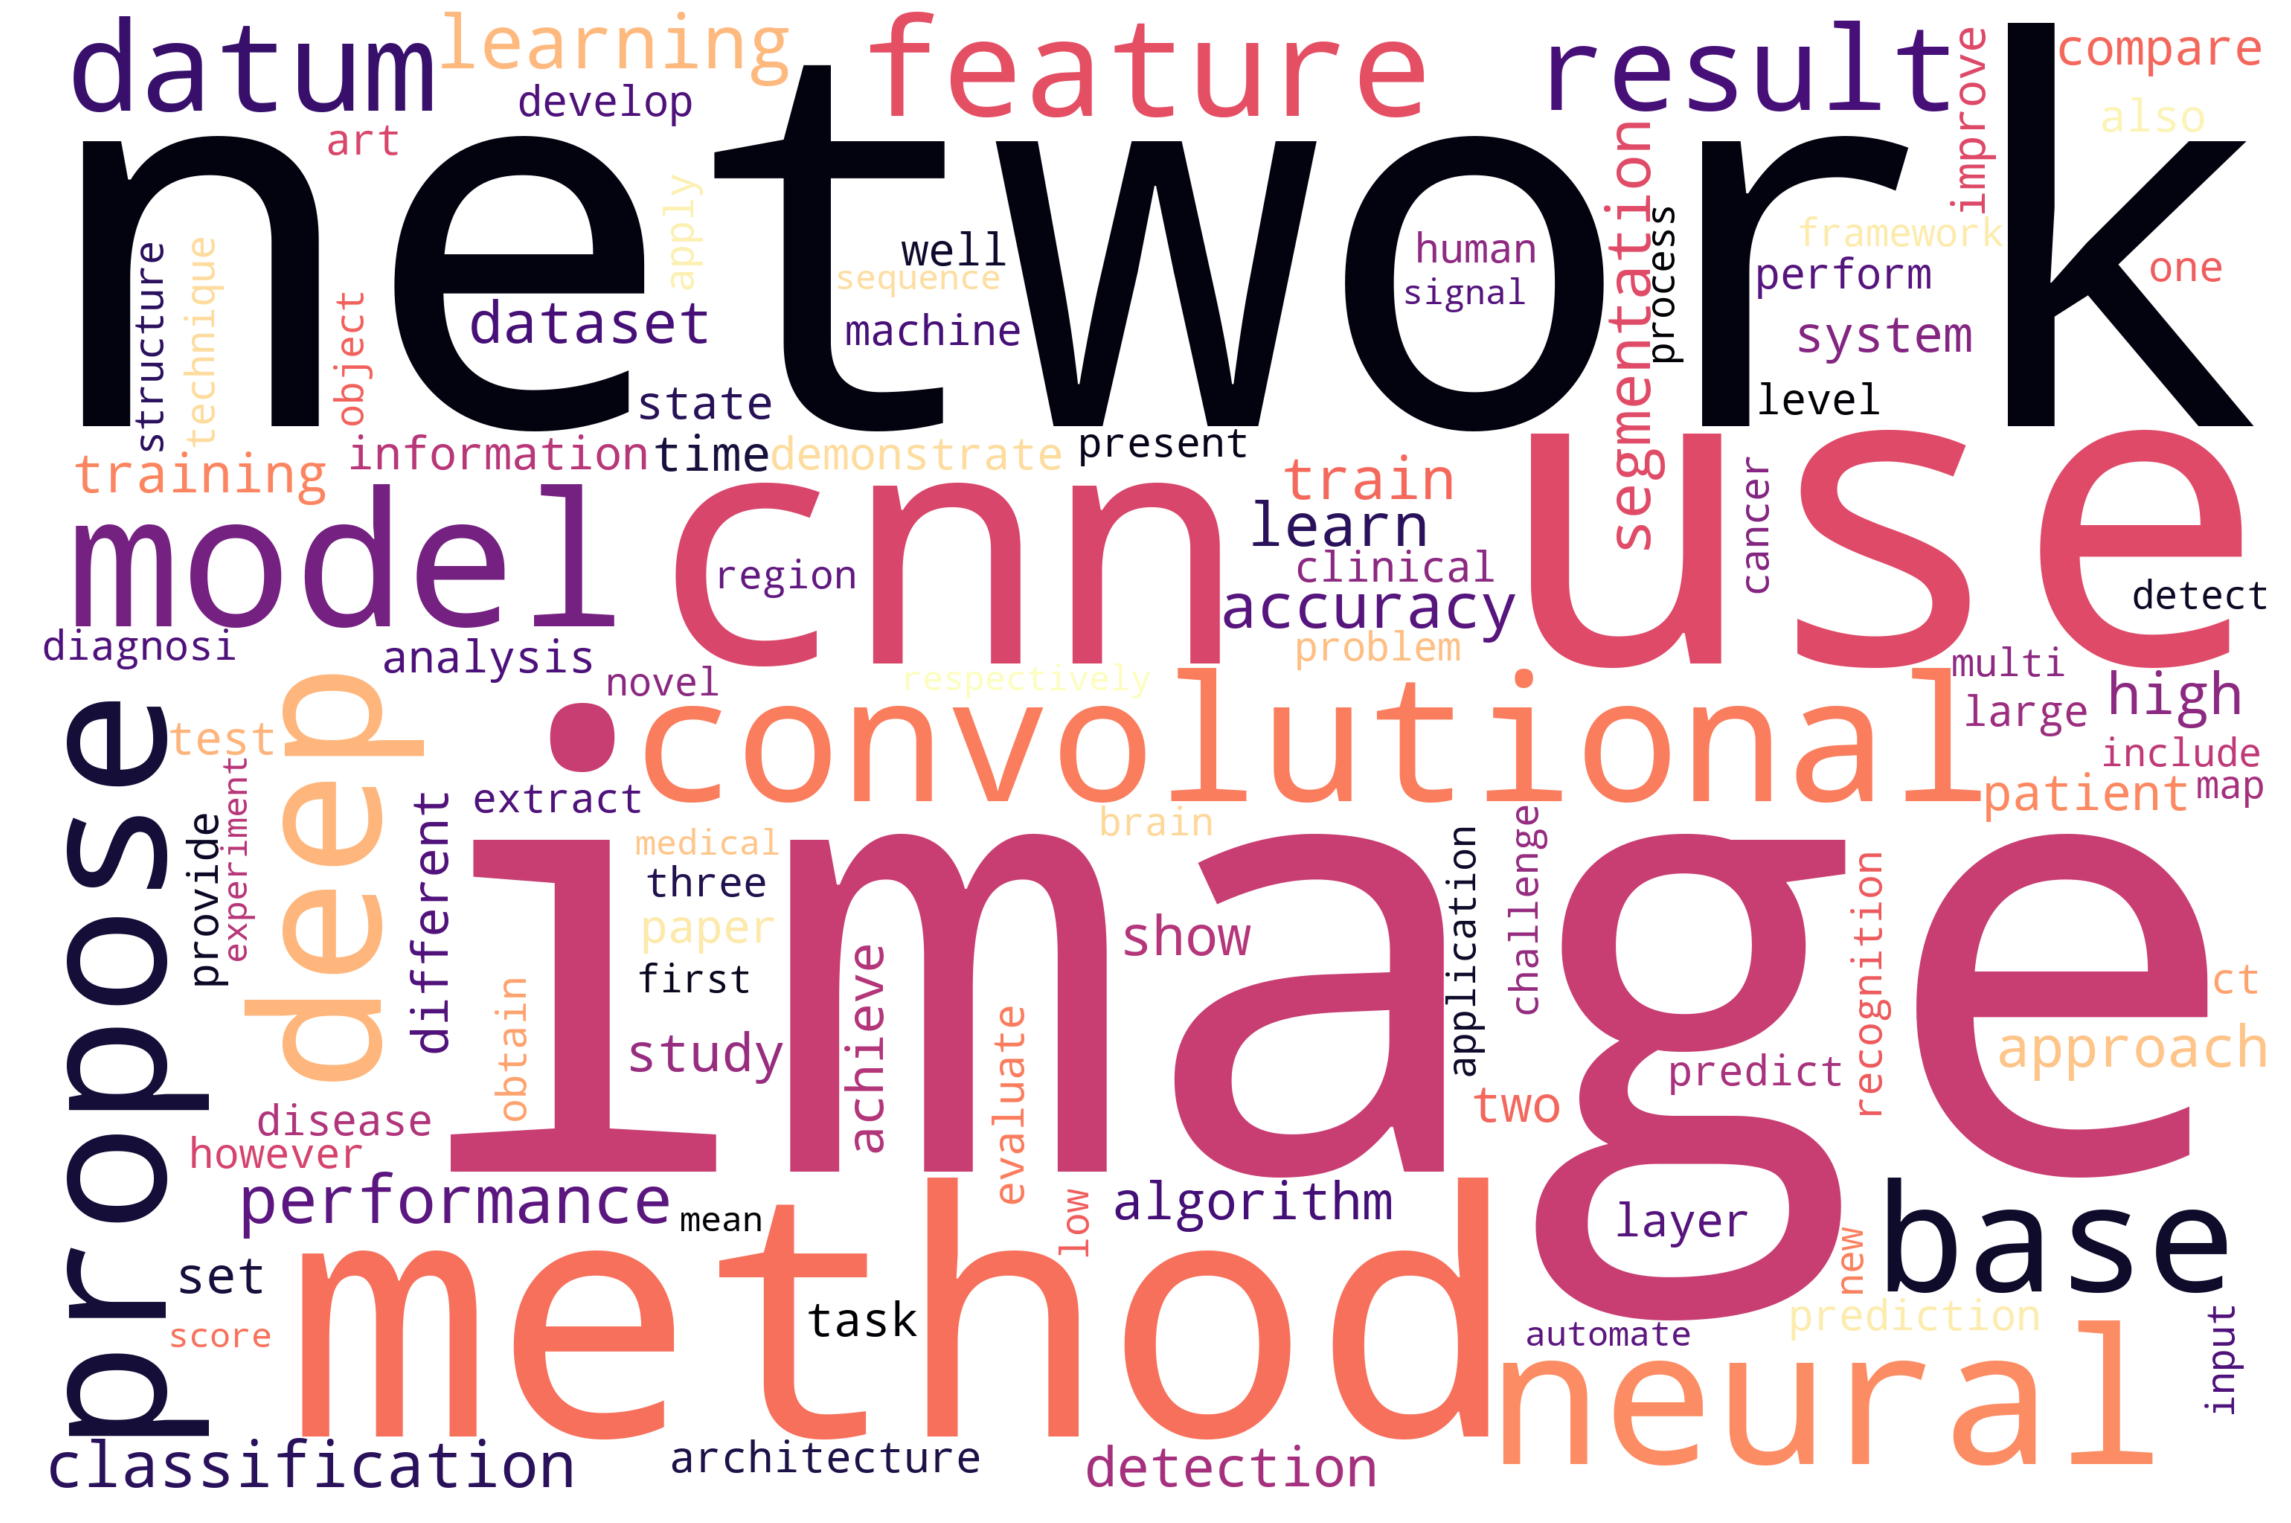

In [9]:
#Word cloud of 100 words in the entire clean text
wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',colormap=plt.cm.magma,
                          stopwords=stop_words,
                          max_words=100,
                           
                          random_state=42,collocations=False
                         ).generate(str(clean_text))

#print(wordcloud)
plt.figure(figsize = (40, 30), edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig("../data/word_cloud.png")
plt.show()

In [33]:
stop_words = stopwords.words('english')
print(len(stop_words))
remove_words = ['overall', 'perform','attempts', 'model','use', 'calculating','performance','trainable',
                'data','result','representations','using','limited','used','feature','proposed','evaluate'
                ,'performance','algorithm','lr','ext','respective','respectively', 'accuracy', 'relatively'
                ,'small','challenge','validation','layer','better','three','detection','show','cnn','li', 
                'small','show','development','training','transfer','twos','cnns','pre','auroc','two','method',
                'parameters','segmentation','convolutional', 'neural', 'network', 'show','task','compare',
                'state','study', 'retrospective', 'datum','prediction','art','require', 'focus', 'base',
                'approach', 'paper', 'present', 'fall', 'due', 'recent', 'exponential', 'increase','analysis',
                'analysis','specificity','basis', 'function', 'kernel', 'area', 'curve', 'auc', 'may', 
                'useful','explore', 'two', 'different','test','models','system','deep', 'learning',
                'approach','require','may', 'useful','information', 'basis','obtain','methods','achieve',
                'level','al', 'research', 'grid', 'also','features', 'techniques', 'hard', 'parameter', 
                'sharing', 'cross', 'stitch', 'train', 'word', 'level', 'however','search', 'currently',
                'trained','article','analytic','datasets','fold', 'cross', 'propose','compared','based',
                'classification','results','dataset','multiple', 'time','architecture','end', 'sensitivity', 
                'specificity','proive','representation','input','technique','large','work','improve','layers',
                'set','learn','experiment','achieved','information','machine','offers', 'high','networks',
                'superior', 'classification', 'accuracy', 'for', 'automated', 'coding', 'support', 'aid', 'address',
               'available','https','important','role', 'application','good','rate','field','new','tool',
               'subject','value','map','quality','application','provide','one','mr', 'false','positive','tune','fine',
                'github','com','precision','recall','long','short','gold', 'standard','problem','demonstrate','apply',
                'well','truth','ground','similarity','coefficient','entity','event','cohort','molecular','goal','knowledge',
                'refer','conditional','name','natural','language','metho','processing','nlp','term','operate',
                'characteristics', 'whole','slide','supplementary', 'significantly', 'improvement','wide','range',
               'hand','craft','open','source','ci','see','outperform']

#identifies and removes duplicates and returns a lits of words
remove_words= list(set(remove_words))
stop_words.extend(remove_words)
print(len(remove_words))
print(len(stop_words))

179
212
391


In [34]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
minus_stopwords = remove_stopwords(clean_text)

In [35]:
clean_text = [" ".join(x) for x in minus_stopwords]

In [36]:
def text_to_words(text):
    for sentence in text:
        yield(gensim.utils.simple_preprocess(str(sentence)))  # deacc=True removes punctuations

words_text = list(text_to_words(clean_text))

print(words_text[3])

['purpose', 'image', 'guide', 'surgical', 'planning', 'brain', 'stimulation', 'dbs', 'develop', 'semantic', 'dbs', 'target', 'prospectively', 'clinically', 'fast', 'gradient', 'echo', 'image', 'patient', 'manually', 'draw', 'prepare', 'subthalamic', 'red', 'nucleus', 'axial', 'cut', 'mm', 'anterior', 'posterior', 'commissure', 'line', 'fully', 'fcn', 'vgg', 'ensure', 'margin', 'identification', 'semantic', 'image', 'contrast', 'augmentation', 'nine', 'original', 'image', 'augment', 'image', 'semantic', 'measure', 'mean', 'mean', 'intersection', 'union', 'target', 'calculate', 'relative', 'distance', 'segment', 'anatomical', 'structure', 'consider', 'bejjani', 'target', 'mean', 'mean', 'intersection', 'union', 'image', 'augment', 'image', 'augment', 'image', 'dice', 'convert', 'intersection', 'union', 'image', 'semantic', 'adaptive', 'anatomical', 'variation', 'size', 'shape', 'asymmetry', 'clinical', 'patient', 'assess', 'essential', 'tremor', 'another', 'bradykinesia', 'gait', 'distur

In [37]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [38]:
lemmatized_words = lemmatization(words_text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [67]:
#clean_text = [" ".join(x) for x in minus_stopwords]

                     Bigram       Freq
0             medical image  47.574107
1           computer vision  41.675639
2        magnetic resonance  35.754146
3             fully connect  31.937706
4   artificial intelligence  31.385882
5                real world  28.422725
6   receiver characteristic  28.114893
7           resonance image  28.021692
8             breast cancer  26.617363
9             random forest  26.352910
10       compute tomography  25.364910
11              image image  24.124727
12              multi scale  21.351305
13               vector svm  20.766828
14           fully automate  20.750748
15          region interest  20.701889
16       computer diagnosis  20.310776
17       object recognition  18.643315
18              lung cancer  18.269639
19              brain tumor  18.234908
20              image patch  18.178962
21         ultrasound image  17.521191
22               eeg signal  16.827283
23             fundus image  16.574556
24         super resoluti

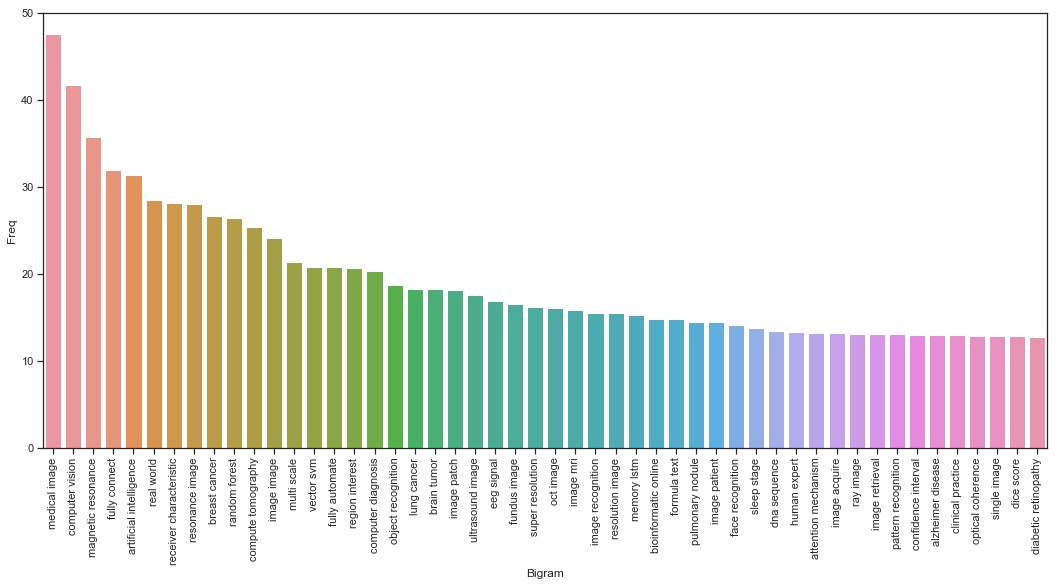

In [39]:
#Most frequently occuring bigrams in the data. plot both bar plot and word cloud of bigrams in the data 
def top_bi_grams(clean_text, n=None):
    clean_text = [" ".join(x) for x in lemmatized_words]
    vectorizer = TfidfVectorizer(ngram_range = (2,2), min_df = 5,stop_words=stop_words).fit(clean_text)
    bows = vectorizer.transform(clean_text)
    sumwords = bows.sum(axis=0) 
    words_freq = [(word, sumwords[0, idx]) for word, idx in     
                  vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top_bigrams = top_bi_grams(clean_text, n=50)
top_bigrams_df = pd.DataFrame(top_bigrams)
top_bigrams_df.columns=["Bigram", "Freq"]
print(top_bigrams_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")

h=sns.barplot(x="Bigram", y="Freq", data=top_bigrams_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90);

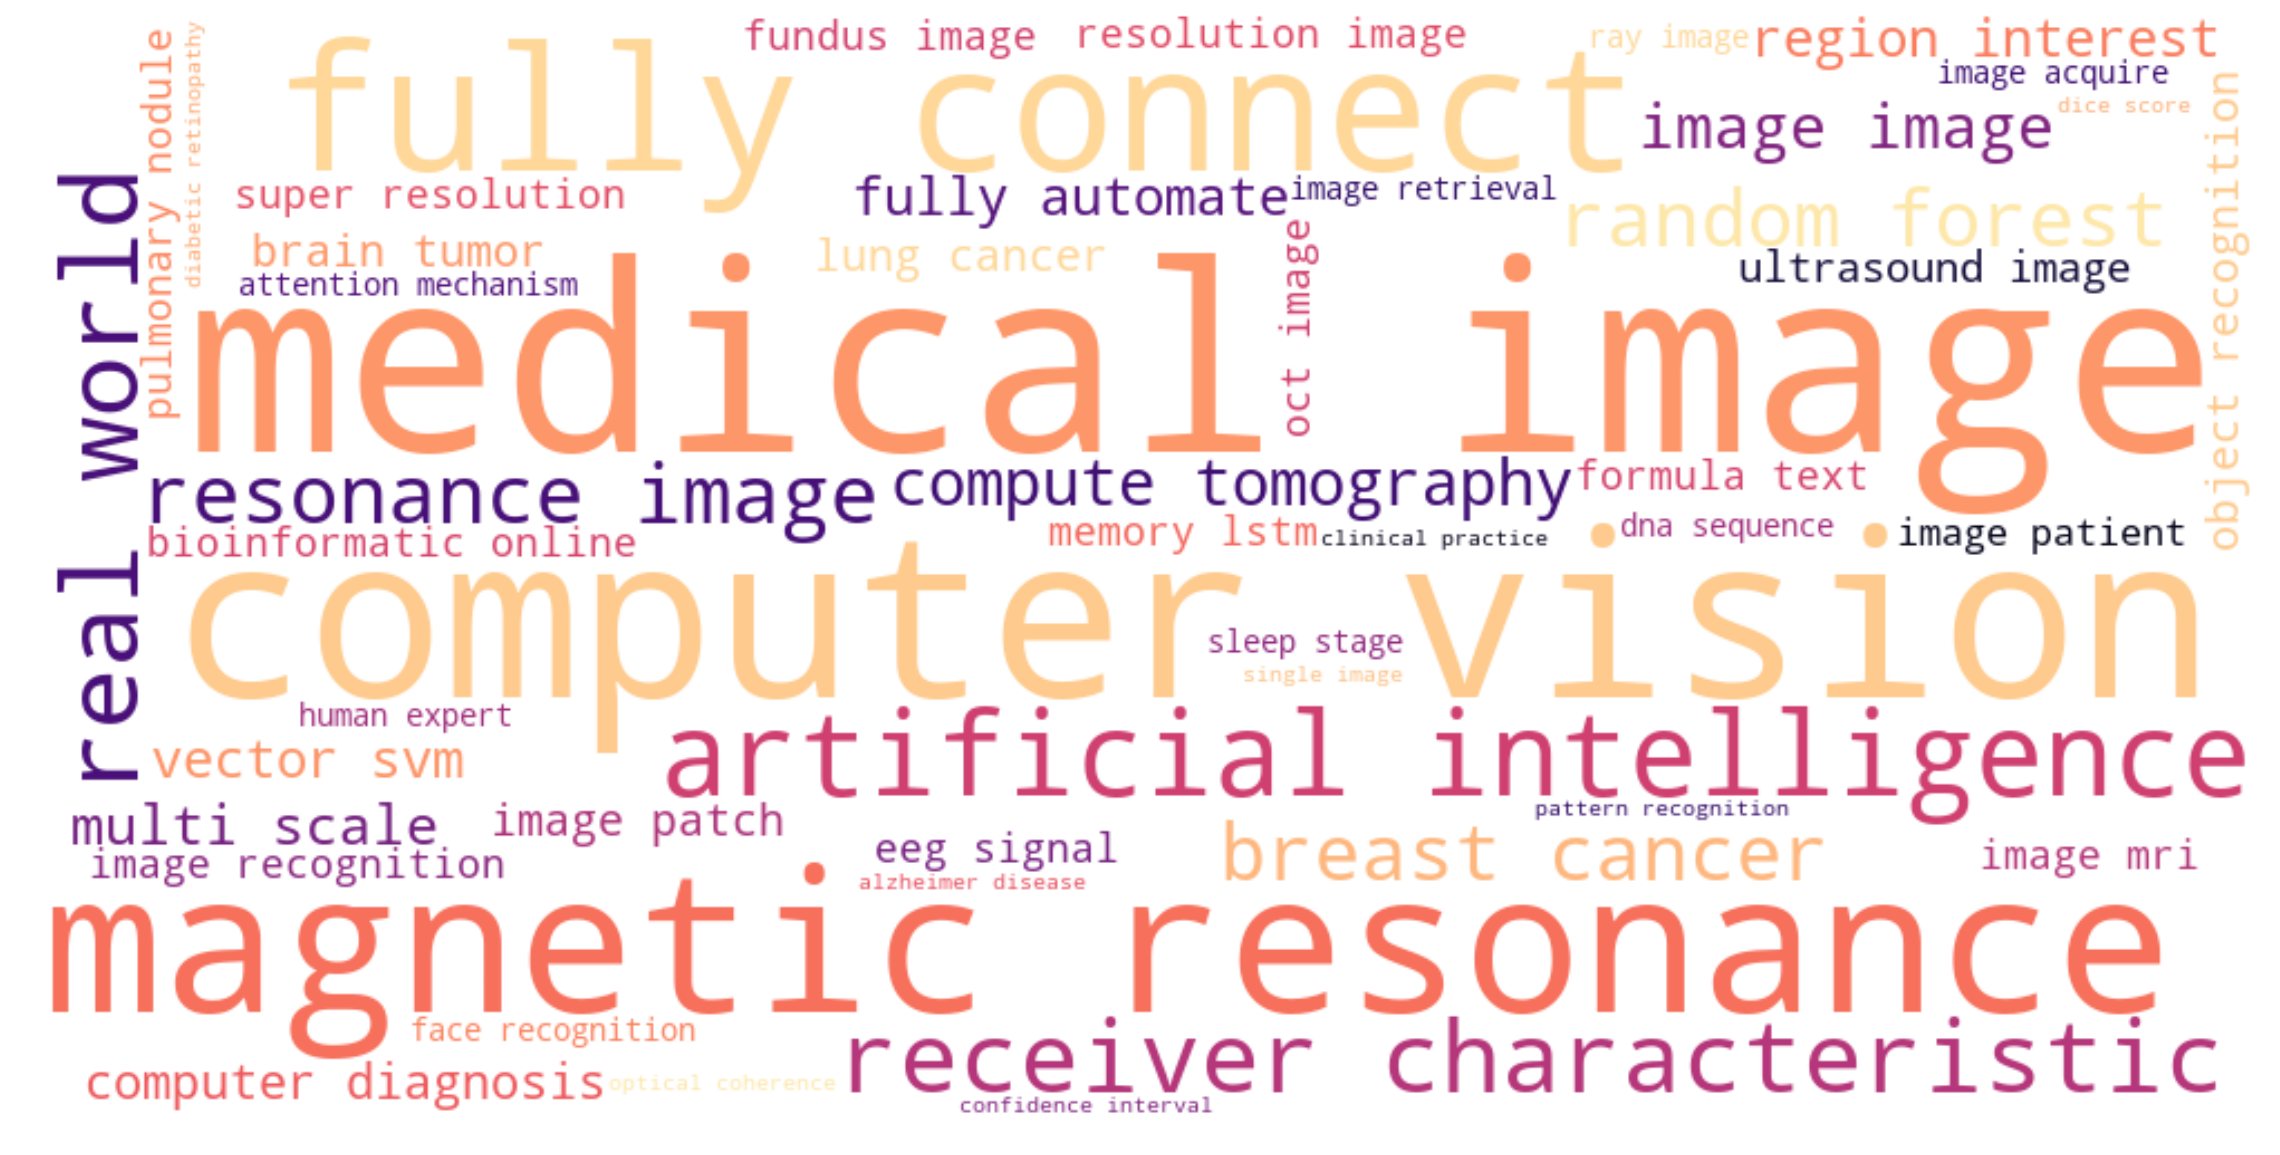

In [40]:
bigrams = {}
for w, x in top_bigrams_df.values:
    bigrams[w] = x
wordcloud = WordCloud(width = 1000,
    height = 500,background_color='white',colormap=plt.cm.magma,margin=5,
                     min_word_length =2, relative_scaling=1, collocations=False)
wordcloud.generate_from_frequencies(bigrams)
plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("../data/word_cloud_cnn.png", bbox_inches='tight')
plt.show()

In [54]:
bigram = Phrases(lemmatized_words, min_count=1, threshold=100)
trigram = Phrases(lemmatized_words, min_count=1, threshold=100)
bigrams_mod = Phraser(bigram)
trigrams_mod = Phraser(trigram)

In [55]:
def bigrams(texts):
    return [bigrams_mod[doc] for doc in texts]
words_bigrams = bigrams(lemmatized_words)

def trigrams(texts):
    return [trigrams_mod[doc] for doc in texts]
words_trigrams = trigrams(lemmatized_words)

In [18]:
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

In [19]:
#data_lemme = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [45]:
# Create Dictionary
id2word = corpora.Dictionary(words_bigrams)


# Create Corpus
texts = words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 3), (20, 2), (21, 5), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 3), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1)], [(7, 2), (13, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 4), (68, 1), (69, 1), (70, 5), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 3), (78, 2), (79, 1), (80, 5), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 3), (102, 4), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1),

In [46]:
id2word[21]

'image'

In [47]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=14, 
                     random_state=100,
                     update_every=1,
                     chunksize=1000,
                     passes=25,
                     alpha='auto',
                     per_word_topics=True)

In [23]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.052*"sequence" + 0.045*"protein" + 0.028*"predict" + 0.019*"structure" + '
  '0.011*"interaction" + 0.010*"contact" + 0.010*"bind" + 0.008*"molecular" + '
  '0.008*"identify" + 0.008*"profile"'),
 (1,
  '0.035*"reconstruction" + 0.032*"registration" + 0.022*"motion" + '
  '0.016*"bone" + 0.011*"surface" + 0.011*"reconstruct" + 0.008*"functional" + '
  '0.008*"answer" + 0.007*"deformation" + 0.007*"formula_see"'),
 (2,
  '0.108*"ct" + 0.023*"scan" + 0.021*"organ" + 0.019*"dose" + 0.013*"pet" + '
  '0.011*"compute_tomography" + 0.010*"vehicle" + 0.010*"image" + '
  '0.010*"denoise" + 0.009*"lung"'),
 (3,
  '0.069*"disease" + 0.058*"age" + 0.027*"plant" + 0.016*"rna" + '
  '0.013*"association" + 0.011*"predict" + 0.010*"leaf" + 0.009*"lymph_node" + '
  '0.008*"mirna" + 0.008*"year"'),
 (4,
  '0.026*"ad" + 0.015*"alzheimer_disease" + 0.014*"lv" + 0.012*"traffic" + '
  '0.010*"cardiac" + 0.008*"skeleton" + 0.007*"pedestrian" + 0.007*"unlabeled" '
  '+ 0.006*"regression" + 0.006*"f

In [48]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.993015149108235

Coherence Score:  0.4538209778412397


In [49]:
# code repurposed from https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

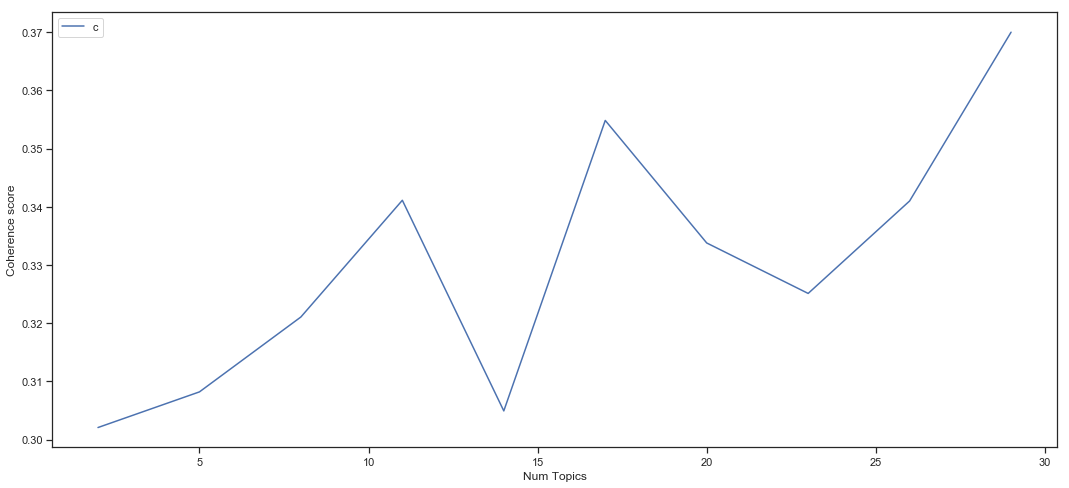

In [50]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigrams, start=2, limit=30, step=3)
# Show graph

limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [51]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.244300 -0.154807       1        1  39.960472
5     -0.245294 -0.026492       2        1  23.205336
7     -0.225067  0.114786       3        1   8.251572
9     -0.182217  0.114994       4        1   6.155498
0     -0.048148 -0.150939       5        1   4.152187
11    -0.036051  0.112009       6        1   3.756444
3     -0.047295  0.185949       7        1   3.040629
13     0.036845 -0.148511       8        1   2.907350
10     0.142268 -0.043616       9        1   2.009287
12     0.114616 -0.135758      10        1   1.992066
2      0.131061 -0.127416      11        1   1.918850
4      0.179993  0.096210      12        1   1.205552
1      0.210340  0.079158      13        1   0.729929
6      0.213249  0.084431      14        1   0.714826, topic_info=     Category          Freq         Term         Total  loglift  logprob
21    Default  11195.000000        image  11195.000000  30.0000  30.0000
356   Default   1317.000000        human   1317.000000  29.0000  29.0000
388   Default   1099.000000       object   1099.000000  28.0000  28.0000
1000  Default   1505.000000  recognition   1505.000000  27.0000  27.0000
487   Default   1095.000000      disease   1095.000000  26.0000  26.0000
...       ...           ...          ...           ...      ...      ...
2387  Topic14     10.250259         axis     46.026634   3.4390  -5.4739
3157  Topic14      9.910258         mark     64.093300   3.0741  -5.5076
2383  Topic14      8.886050     toxicity     24.285538   3.9355  -5.6167
123   Topic14      9.274624       unique     92.123489   2.6450  -5.5739
766   Topic14      8.968680        focal     35.041401   3.5781  -5.6074

[793 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
2899      8  0.951862         ab_initio
2168      3  0.409190         abdominal
2168      4  0.585886         abdominal
5828      6  0.941623        aberration
1196      5  0.977871     accelerometer
...     ...       ...               ...
2851     12  0.946190  wireless_capsule
711       1  0.124905              year
711       2  0.626975              year
711       4  0.244912              year
3624     13  0.867739              yolo

[1425 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 8, 10, 1, 12, 4, 14, 11, 13, 3, 5, 2, 7])

In [52]:
pyLDAvis.save_html(vis, '../data/lda.html')